In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [12]:
#년도별 5대범죄 검거 발생 현황 2011-2018
crime_data_2011 = pd.read_csv('crime_2011.csv', encoding = 'euc-kr')
crime_data_2012 = pd.read_csv('crime_2012.csv', encoding = 'euc-kr')
crime_data_2013 = pd.read_csv('crime_2013.csv', encoding = 'euc-kr')
crime_data_2014 = pd.read_csv('crime_2014.csv', encoding = 'euc-kr')
crime_data_2015 = pd.read_csv('crime_2015.csv', encoding = 'euc-kr')
crime_data_2016 = pd.read_csv('crime_2016.csv', encoding = 'euc-kr')
crime_data_2017 = pd.read_csv('crime_2017.csv', encoding = 'euc-kr')
crime_data_2018 = pd.read_csv('crime_2018.csv', encoding = 'euc-kr')

In [13]:
#테이블에 년도 추가
crime_data_2011['년도'] = 2011
crime_data_2012['년도'] = 2012
crime_data_2013['년도'] = 2013
crime_data_2014['년도'] = 2014
crime_data_2015['년도'] = 2015
crime_data_2016['년도'] = 2016
crime_data_2017['년도'] = 2017
crime_data_2018['년도'] = 2018

In [14]:
#순서 바꾸기
crime_data_2011 = pd.DataFrame(crime_data_2011,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2012 = pd.DataFrame(crime_data_2012,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2013 = pd.DataFrame(crime_data_2013,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2014 = pd.DataFrame(crime_data_2014,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2015 = pd.DataFrame(crime_data_2015,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2016 = pd.DataFrame(crime_data_2016,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2017 = pd.DataFrame(crime_data_2017,columns = ['년도','구분','죄종','발생검거','건수'])
crime_data_2018 = pd.DataFrame(crime_data_2018,columns = ['년도','구분','죄종','발생검거','건수'])

In [15]:
#전체 이어붙이기
crime_data = pd.concat([crime_data_2011, crime_data_2012,crime_data_2013,
                            crime_data_2014,crime_data_2015,crime_data_2016,
                           crime_data_2017,crime_data_2018],sort=False)

In [24]:
crime_data.head()

년도  구분  죄종 발생검거  건수
0  2011  중부  살인   발생   2
1  2011  중부  살인   검거   3
2  2011  중부  강도   발생  14
3  2011  중부  강도   검거  19
4  2011  중부  강간   발생  89

In [25]:
############### 쿼리문 1번 #################
temp = crime_data[['년도','발생검거','건수']]
crime_year_total = temp.groupby(['년도','발생검거']).sum()
crime_year_total.head()

건수
년도   발생검거        
2011 검거     84353
     발생    132938
2012 검거     81741
     발생    137724
2013 검거     78232

In [18]:
total_gum =crime_year_total.unstack('발생검거')
#리스트를 지우는 코드이기 때문에 반복해서 실행 불가능
total_gum.columns = total_gum.columns.droplevel([0])
total_gum.columns

Index(['검거', '발생'], dtype='object', name='발생검거')

In [19]:
total_ch = pd.DataFrame(total_gum, columns = ['발생', '검거'])# 컬럼 순서 변경해줌
total_ch

발생     검거
년도                 
2011  132938  84353
2012  137724  81741
2013  132958  78232
2014  130674  77879
2015  126401  81193
2016  117839  83056
2017  107835  78109
2018  101948  73196

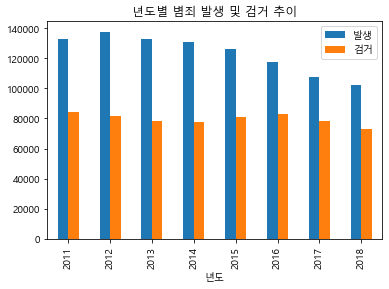

In [22]:
plt.rc('font',family = 'Malgun Gothic')
total_ch.plot(kind='bar', legend=True, title='년도별 볌죄 발생 및 검거 추이')

In [128]:
######################################################################

In [ ]:
##########################쿼리문 2번############################
#먼저 모든 년도 범죄수를 합치기 위한 과정 2번은 재현이 코드에

In [ ]:
###################### 쿼리문 3번###########################

In [26]:
#각 파일 년도 삭제 (한번 실행하고 한번더 실행하면 '년도컬럼'이 없기 때문에 오류)
temp = [crime_data_2011,crime_data_2012,crime_data_2013,crime_data_2014,crime_data_2015,crime_data_2016,crime_data_2017,crime_data_2018]

for j in temp:
    j = j.drop(['년도'], axis='columns', inplace=True)

In [84]:
#테이블 합치기 import copy 선언 필요
temp = [crime_data_2011['건수'],crime_data_2012['건수'],crime_data_2013['건수'],crime_data_2014['건수'],
        crime_data_2015['건수'],crime_data_2016['건수'],crime_data_2017['건수'],crime_data_2018['건수']]

#더하기 전에 기본 틀 복사해주기
crime_data_add = copy.deepcopy(crime_data_2011) #갚은 복사(import copy)
crime_data_add['건수'] = 0

#for문으로 모든 년도 건수 더하기
for j in temp:
    crime_data_add['건수'] = crime_data_add['건수'] + j

crime_data_add.head()# 각 지역별 모든 해 건수 더한 데이터

구분  죄종 발생검거    건수
0  중부  살인   발생    14
1  중부  살인   검거    15
2  중부  강도   발생    54
3  중부  강도   검거    60
4  중부  강간   발생  1011

In [85]:
crime_where = crime_data_add[['구분','발생검거','건수']]
crime_where.head()

구분 발생검거    건수
0  중부   발생    14
1  중부   검거    15
2  중부   발생    54
3  중부   검거    60
4  중부   발생  1011

In [44]:
where_ch = crime_where.groupby(['구분','발생검거']).sum()

In [39]:
total_where =where_ch.unstack('발생검거')
#리스트를 지우는 코드이기 때문에 반복해서 실행 불가능
total_where.columns = total_where.columns.droplevel([0])
total_where.columns

Index(['검거', '발생'], dtype='object', name='발생검거')

In [87]:
total_where

발생검거     검거     발생
구분                
강남    27027  43415
강동    25998  40146
강북    23704  32050
강서    30065  44602
관악    30915  50438
광진    27906  44020
구로    27560  43618
금천    21424  29973
남대문   10603  15988
노원    24981  38231
도봉    15324  22563
동대문   25420  36678
동작    18159  30069
마포    26918  44483
방배     6194   9898
서대문   19872  30509
서부    11193  16259
서초    19958  32168
성동    16302  25217
성북    11498  17862
송파    31332  55392
수서    17247  27209
양천    21514  34620
영등포   33030  53370
용산    20962  31375
은평    15085  22122
종로    12673  18826
종암    10128  14964
중랑    28718  41421
중부    13935  22597
혜화    12114  18234

In [80]:
total_where_ch = pd.DataFrame(total_where, columns = ['발생', '검거'])# 컬럼 순서 변경해줌
total_where_ch_balsort = total_where_ch.sort_values(by=['발생'], axis=0,ascending=False)#발생 건수로 내림차순
total_where_ch_gumsort = total_where_ch.sort_values(by=['검거'], axis=0,ascending=False)#검거 건수로 내림차순

In [81]:
plt.rc('font',family = 'Malgun Gothic')
bar_chart =total_where_ch_balsort.plot(kind='bar', legend=True,figsize=(18, 8),fontsize = 14)
plt.title('구 별 범죄 발생 및 검거 건수(발생 내림차순)',fontsize = 20)

Text(0.5, 1.0, '구 별 범죄 발생 및 검거 건수(발생 내림차순)')

Text(0.5, 1.0, '구 별 범죄 발생 및 검거 건수(검거 내림차순)')

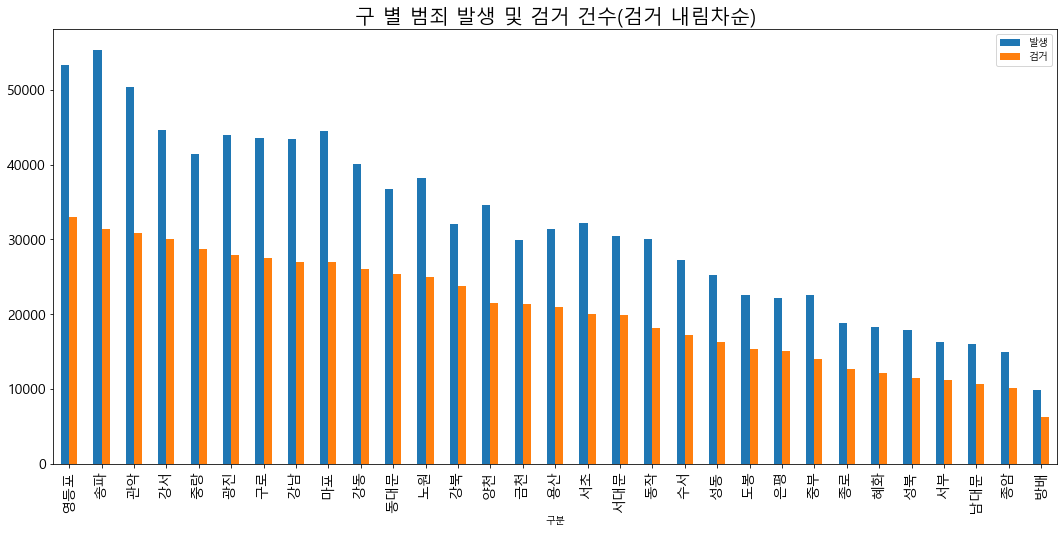

In [83]:
plt.rc('font',family = 'Malgun Gothic')
bar_chart =total_where_ch_gumsort.plot(kind='bar', legend=True,figsize=(18, 8),fontsize = 14)
plt.title('구 별 범죄 발생 및 검거 건수(검거 내림차순)',fontsize = 20)

In [ ]:
#######################################################################################

In [ ]:
plt.rc('font',family = 'Malgun Gothic')
total_ch.plot(kind='bar', legend=True, title='년도별 볌죄 발생 및 검거 추이')

In [10]:
crime_station = crime_data_add.pivot_table(
    crime_data_add, index=["구분"], columns=["죄종","발생검거"], aggfunc=[np.sum])

crime_station

sum                                             
       건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    174  282  25  47  14  15   711  2442  2747  3195
강동    142  191  31  36   6   7  1011  2426  2532  3065
강북    128  168  18  30   6   7   543  1522  2293  2689
강서    182  215  43  45  20  18   861  2776  2748  3346
관악    222  361  36  54  17  19   775  2694  3119  3826
광진    226  260  38  48  11  11  1065  2418  2301  2867
구로    150  326  24  39  10  12   984  2014  2804  3327
금천     89  107  24  30  14  14   753  1527  1960  2399
남대문    50   62   9   7   2   1   461   984   895  1043
노원    138  169  18  25   8   8   890  1723  2234  2594
도봉     99  100  30  29  10  10   375  1418  1440  1700
동대문   196  222  69  72  11  14   931  2046  2313  2727
동작     84  249  12  22   6   5   527  1722  1594  1932
마포    143  172  22  22   3   3   647  2105  2275  2740
방배     35   40   7  11   2   2   234   565   562   643
서대문   145  174  23  26   6   6   702  1879  1604  1962
서부     75   71  17   7   4   4   376   909  1086  1353
서초    147  283  15  28   4   7   741  1733  1576  1866
성동     74   98  17  24   6   7   467  1376  1456  1729
성북     59   99   8  10   3   5   425   904  1066  1274
송파    209  292  38  54   5   6   845  4004  2915  3735
수서    109  159  30  26   5   8   422  1780  1516  2000
양천     89  131  25  29   4   4   698  2016  2062  2627
영등포   163  221  40  53  19  18   879  2688  3338  4143
용산    153  172  36  47  13  13   555  1592  1967  2454
은평     73   82  13  21   8  10   431  1072  1339  1617
종로     82   80  12  16   5   6   534  1001  1090  1296
종암     65   75  15  17   4   4   382   971   886  1055
중랑    186  204  55  46  10  10   778  1898  3246  3771
중부     60   89  19  14   3   2   457  1266  1369  1622
혜화     75   98  16  20   2   2   425   941  1287  1464

In [11]:
crime_station.columns

MultiIndex(levels=[['sum'], ['건수'], ['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[None, None, '죄종', '발생검거'])

In [12]:
#리스트를 지우는 코드이기 때문에 반복해서 실행 불가능
crime_station.columns = crime_station.columns.droplevel([0,1])
crime_station.columns

MultiIndex(levels=[['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['죄종', '발생검거'])

In [13]:
#crime_station['강도', '검거']

In [14]:
#crime_station['살인', '발생']

In [15]:
crime_station

죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    174  282  25  47  14  15   711  2442  2747  3195
강동    142  191  31  36   6   7  1011  2426  2532  3065
강북    128  168  18  30   6   7   543  1522  2293  2689
강서    182  215  43  45  20  18   861  2776  2748  3346
관악    222  361  36  54  17  19   775  2694  3119  3826
광진    226  260  38  48  11  11  1065  2418  2301  2867
구로    150  326  24  39  10  12   984  2014  2804  3327
금천     89  107  24  30  14  14   753  1527  1960  2399
남대문    50   62   9   7   2   1   461   984   895  1043
노원    138  169  18  25   8   8   890  1723  2234  2594
도봉     99  100  30  29  10  10   375  1418  1440  1700
동대문   196  222  69  72  11  14   931  2046  2313  2727
동작     84  249  12  22   6   5   527  1722  1594  1932
마포    143  172  22  22   3   3   647  2105  2275  2740
방배     35   40   7  11   2   2   234   565   562   643
서대문   145  174  23  26   6   6   702  1879  1604  1962
서부     75   71  17   7   4   4   376   909  1086  1353
서초    147  283  15  28   4   7   741  1733  1576  1866
성동     74   98  17  24   6   7   467  1376  1456  1729
성북     59   99   8  10   3   5   425   904  1066  1274
송파    209  292  38  54   5   6   845  4004  2915  3735
수서    109  159  30  26   5   8   422  1780  1516  2000
양천     89  131  25  29   4   4   698  2016  2062  2627
영등포   163  221  40  53  19  18   879  2688  3338  4143
용산    153  172  36  47  13  13   555  1592  1967  2454
은평     73   82  13  21   8  10   431  1072  1339  1617
종로     82   80  12  16   5   6   534  1001  1090  1296
종암     65   75  15  17   4   4   382   971   886  1055
중랑    186  204  55  46  10  10   778  1898  3246  3771
중부     60   89  19  14   3   2   457  1266  1369  1622
혜화     75   98  16  20   2   2   425   941  1287  1464

In [16]:
tmp = crime_station.columns.get_level_values(0) + crime_station.columns.get_level_values(1)
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [17]:
crime_station_plus = copy.deepcopy(crime_station)
crime_station_plus.columns = tmp
crime_station_plus.head()

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
구분                                                            
강남   174   282    25    47    14    15   711  2442  2747  3195
강동   142   191    31    36     6     7  1011  2426  2532  3065
강북   128   168    18    30     6     7   543  1522  2293  2689
강서   182   215    43    45    20    18   861  2776  2748  3346
관악   222   361    36    54    17    19   775  2694  3119  3826

In [18]:
#각 범죄의 검거율 계산
crime_station_rate = copy.deepcopy(crime_station_plus)
del crime_station_rate['강간검거']
del crime_station_rate['강간발생']
del crime_station_rate['강도검거']
del crime_station_rate['강도발생']
del crime_station_rate['살인검거']
del crime_station_rate['살인발생']
del crime_station_rate['절도검거']
del crime_station_rate['절도발생']
del crime_station_rate['폭력검거']
del crime_station_rate['폭력발생']

crime_station_rate['강간검거율'] = crime_station_plus['강간검거']/crime_station_plus['강간발생']*100
crime_station_rate['강도검거율'] = crime_station_plus['강도검거']/crime_station_plus['강도발생']*100
crime_station_rate['살인검거율'] = crime_station_plus['살인검거']/crime_station_plus['살인발생']*100
crime_station_rate['절도검거율'] = crime_station_plus['절도검거']/crime_station_plus['절도발생']*100
crime_station_rate['폭력검거율'] = crime_station_plus['폭력검거']/crime_station_plus['폭력발생']*100
crime_station_rate.head()

강간검거율      강도검거율       살인검거율      절도검거율      폭력검거율
구분                                                        
강남  61.702128  53.191489   93.333333  29.115479  85.978091
강동  74.345550  86.111111   85.714286  41.673537  82.610114
강북  76.190476  60.000000   85.714286  35.676741  85.273336
강서  84.651163  95.555556  111.111111  31.015850  82.127914
관악  61.495845  66.666667   89.473684  28.767632  81.521171

In [86]:
# 검거율은 전년도 발생한 건수의 검거가 포함되어있어 100이 넘는 경우 100으로 치환
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_station_rate.loc[crime_station_rate[column] > 100, column] = 100
    
crime_station_rate

NameError: name 'crime_station_rate' is not defined

년도   구분  죄종 발생검거    건수
0    2011   중부  살인   발생     2
1    2011   중부  살인   검거     3
2    2011   중부  강도   발생    14
3    2011   중부  강도   검거    19
4    2011   중부  강간   발생    89
5    2011   중부  강간   검거    60
6    2011   중부  절도   발생  1266
7    2011   중부  절도   검거   457
8    2011   중부  폭력   발생  1622
9    2011   중부  폭력   검거  1369
10   2011   종로  살인   발생     6
11   2011   종로  살인   검거     5
12   2011   종로  강도   발생    16
13   2011   종로  강도   검거    12
14   2011   종로  강간   발생    80
15   2011   종로  강간   검거    82
16   2011   종로  절도   발생  1001
17   2011   종로  절도   검거   534
18   2011   종로  폭력   발생  1296
19   2011   종로  폭력   검거  1090
20   2011  남대문  살인   발생     1
21   2011  남대문  살인   검거     2
22   2011  남대문  강도   발생     7
23   2011  남대문  강도   검거     9
24   2011  남대문  강간   발생    62
25   2011  남대문  강간   검거    50
26   2011  남대문  절도   발생   984
27   2011  남대문  절도   검거   461
28   2011  남대문  폭력   발생  1043
29   2011  남대문  폭력   검거   895
30   2011  서대문  살인   발생     6
31   2011  서대문  살인   검거     6
32   2011  서대문  강도   발생    26
33   2011  서대문  강도   검거    23
34   2011  서대문  강간   발생   174
35   2011  서대문  강간   검거   145
36   2011  서대문  절도   발생  1879
37   2011  서대문  절도   검거   702
38   2011  서대문  폭력   발생  1962
39   2011  서대문  폭력   검거  1604
40   2011   혜화  살인   발생     2
41   2011   혜화  살인   검거     2
42   2011   혜화  강도   발생    20
43   2011   혜화  강도   검거    16
44   2011   혜화  강간   발생    98
45   2011   혜화  강간   검거    75
46   2011   혜화  절도   발생   941
47   2011   혜화  절도   검거   425
48   2011   혜화  폭력   발생  1464
49   2011   혜화  폭력   검거  1287
50   2011   용산  살인   발생    13
51   2011   용산  살인   검거    13
52   2011   용산  강도   발생    47
53   2011   용산  강도   검거    36
54   2011   용산  강간   발생   172
55   2011   용산  강간   검거   153
56   2011   용산  절도   발생  1592
57   2011   용산  절도   검거   555
58   2011   용산  폭력   발생  2454
59   2011   용산  폭력   검거  1967
60   2011   성북  살인   발생     5
61   2011   성북  살인   검거     3
62   2011   성북  강도   발생    10
63   2011   성북  강도   검거     8
64   2011   성북  강간   발생    99
65   2011   성북  강간   검거    59
66   2011   성북  절도   발생   904
67   2011   성북  절도   검거   425
68   2011   성북  폭력   발생  1274
69   2011   성북  폭력   검거  1066
70   2011  동대문  살인   발생    14
71   2011  동대문  살인   검거    11
72   2011  동대문  강도   발생    72
73   2011  동대문  강도   검거    69
74   2011  동대문  강간   발생   222
75   2011  동대문  강간   검거   196
76   2011  동대문  절도   발생  2046
77   2011  동대문  절도   검거   931
78   2011  동대문  폭력   발생  2727
79   2011  동대문  폭력   검거  2313
80   2011   마포  살인   발생     3
81   2011   마포  살인   검거     3
82   2011   마포  강도   발생    22
83   2011   마포  강도   검거    22
84   2011   마포  강간   발생   172
85   2011   마포  강간   검거   143
86   2011   마포  절도   발생  2105
87   2011   마포  절도   검거   647
88   2011   마포  폭력   발생  2740
89   2011   마포  폭력   검거  2275
90   2011  영등포  살인   발생    18
91   2011  영등포  살인   검거    19
92   2011  영등포  강도   발생    53
93   2011  영등포  강도   검거    40
94   2011  영등포  강간   발생   221
95   2011  영등포  강간   검거   163
96   2011  영등포  절도   발생  2688
97   2011  영등포  절도   검거   879
98   2011  영등포  폭력   발생  4143
99   2011  영등포  폭력   검거  3338
100  2011   성동  살인   발생     7
101  2011   성동  살인   검거     6
102  2011   성동  강도   발생    24
103  2011   성동  강도   검거    17
104  2011   성동  강간   발생    98
105  2011   성동  강간   검거    74
106  2011   성동  절도   발생  1376
107  2011   성동  절도   검거   467
108  2011   성동  폭력   발생  1729
109  2011   성동  폭력   검거  1456
110  2011   동작  살인   발생     5
111  2011   동작  살인   검거     6
112  2011   동작  강도   발생    22
113  2011   동작  강도   검거    12
114  2011   동작  강간   발생   249
115  2011   동작  강간   검거    84
116  2011   동작  절도   발생  1722
117  2011   동작  절도   검거   527
118  2011   동작  폭력   발생  1932
119  2011   동작  폭력   검거  1594
120  2011   광진  살인   발생    11
121  2011   광진  살인   검거    11
122  2011   광진  강도   발생    48
123  2011   광진  강도   검거    38
124  2011   광진  강간   발생   260
125  2011   광진  강간   검거   226
126  2011   광진  절도   발생  2418
127  2011   광진  절도   검거  1065
128  2011   광진  폭력   발생  2867
129  2011   광진  폭력   검거  2301
130  2011   서부  살인   발생     4
131  2011   서부  살인   검거     4
132  2011   서부  강